In [1]:
import os
import json
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import re
import matplotlib.pyplot as plt
import seaborn as sns
PATH = "./sample_data/"
%matplotlib inline

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abzal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abzal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
df = pd.read_json("./sample_data/spacearxiv.json")

In [5]:
def preprocess_text(text, flag):
    text = text.lower()
    text = text.replace("abstract:","")
    text = re.sub("[^A-Za-z]+"," ",text)
    if flag:
        tokens = nltk.word_tokenize(text)
        tokens = [token for token in tokens if not token in stopwords.words("english")]
        text = " ".join(tokens)
    return text
        

In [6]:
df['cleaned_abstract'] = df['abstract'].apply(lambda x: preprocess_text(x,True))

In [7]:
df.head()

,url,title,date_publ,authors,abstract,categories,url_pdf,cleaned_abstract
0,https://arxiv.org/abs/2202.03622,Title:The synergistic modulation of electronic...,8 Feb 2022,"[Linfeng Yu, Jinyuan Xu, Chen Shen, E Zhou, Ji...",Abstract: The design of novel devices with sp...,[Materials Science (cond-mat.mtrl-sci)],/pdf/2202.03622,design novel devices specific technical intere...
1,https://arxiv.org/abs/2202.02773,Title:Probing Cosmic Inflation with the LiteBI...,6 Feb 2022,"[LiteBIRD Collaboration: E. Allys, K. Arnold, ...","Abstract: LiteBIRD, the Lite (Light) satellit...",[Instrumentation and Methods for Astrophysics ...,/pdf/2202.02773,litebird lite light satellite study b mode pol...
2,https://arxiv.org/abs/2202.02429,Title:Verifying Inverse Model Neural Networks,4 Feb 2022,"[Chelsea Sidrane, Sydney Katz, Anthony Corso, ...",Abstract: Inverse problems exist in a wide va...,"[Machine Learning (cs.LG), Logic in Computer ...",/pdf/2202.02429,inverse problems exist wide variety physical d...
3,https://arxiv.org/abs/2202.01203,Title:High pressure induced precipitation in A...,2 Feb 2022,"[Abhinav Parakh, Andrew C. Lee, Stella Charito...",Abstract: Precipitate-matrix interactions gov...,"[Materials Science (cond-mat.mtrl-sci), Other...",/pdf/2202.01203,precipitate matrix interactions govern mechani...
4,https://arxiv.org/abs/2202.00791,Title:Mars Terrain Segmentation with Less Labels,1 Feb 2022,"[Edwin Goh, Jingdao Chen, Brian Wilso]",Abstract: Planetary rover systems need to per...,[Computer Vision and Pattern Recognition (cs.C...,/pdf/2202.00791,planetary rover systems need perform terrain s...


In [8]:
vecr = TfidfVectorizer(min_df=5, max_df=0.95)
X = vecr.fit_transform(df["cleaned_abstract"])

In [9]:
kmeans = KMeans(n_clusters=3,random_state=111)
kmeans.fit(X)


KMeans(n_clusters=3, random_state=111)

In [10]:
clusters = kmeans.labels_

In [11]:
len(list(clusters))

4317

In [12]:
svd = TruncatedSVD(n_components=2, random_state=111)
svd_vec = svd.fit_transform(X)

In [13]:
svd_vec.shape

(4317, 2)

In [14]:
df['cluster'] = clusters

In [15]:
df['y'] = svd_vec[:,0]
df['x'] = svd_vec[:,1]

In [16]:
def interpret(n):
  res = dict()
  centroids = pd.DataFrame(X.todense()).groupby(clusters).mean()
  terms = vecr.get_feature_names_out()
  for i,r in centroids.iterrows():
    res[i] = ",".join([terms[t] for t in np.argsort(r)[-n:]])
  return res

In [17]:
cluster_map = interpret(3)
df['cluster'] = df['cluster'].map(cluster_map)

In [18]:
df[["title","categories","cluster"]].head()

,title,categories,cluster
0,Title:The synergistic modulation of electronic...,[Materials Science (cond-mat.mtrl-sci)],"system,design,control"
1,Title:Probing Cosmic Inflation with the LiteBI...,[Instrumentation and Methods for Astrophysics ...,"mission,data,spacecraft"
2,Title:Verifying Inverse Model Neural Networks,"[Machine Learning (cs.LG), Logic in Computer ...","system,design,control"
3,Title:High pressure induced precipitation in A...,"[Materials Science (cond-mat.mtrl-sci), Other...","mission,data,spacecraft"
4,Title:Mars Terrain Segmentation with Less Labels,[Computer Vision and Pattern Recognition (cs.C...,"system,design,control"


<AxesSubplot:title={'center':'The first vizualization at the course'}, xlabel='x', ylabel='y'>

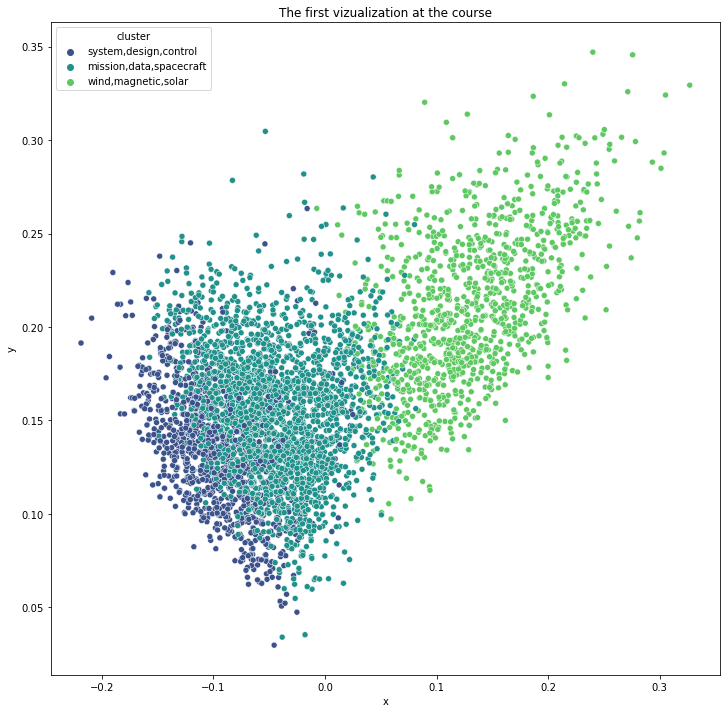

In [19]:
plt.figure(figsize=(12,12))
plt.title("The first vizualization at the course")
sns.scatterplot(data=df,y='y',x='x', hue='cluster',palette='viridis')

In [20]:
df['date_publ'].unique().shape

(3417,)

In [ ]:
### Home Work
### Vizualize the clusters grouped by date_publ with the help of TimeLine d3js components

In [23]:
df.to_json("processed_spacearxiv.json", indent=2)

In [ ]:
### Propose your idea to show technologies from spacearxiv.json with the help of Moqups and pipeline
